In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/studentcnn/pytorch/default/1/model (4).pth


In [2]:
!pip install detectors -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.8/616.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.2/126.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 5.9 MB/s eta 0:00:00


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

from transformers import AutoImageProcessor, ResNetForImageClassification

from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader


2025-07-20 19:00:01.829242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753038002.041984      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753038002.102786      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import torch,timm,detectors
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.nn import KLDivLoss
transform = transforms.Compose([
    transforms.ToTensor()
])
train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128 , shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#teacher_model = timm.create_model("resnet34_cifar10", pretrained=True).to(device)
processor = AutoImageProcessor.from_pretrained("jialicheng/cifar100-resnet-50")
teacher_model = ResNetForImageClassification.from_pretrained("jialicheng/cifar100-resnet-50").to(device)
teacher_model.eval()

100%|██████████| 169M/169M [00:02<00:00, 57.2MB/s]


preprocessor_config.json:   0%|          | 0.00/621 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/95.1M [00:00<?, ?B/s]

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

In [5]:

cifar10_test = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Split into validation and test sets (50/50)
val_size = len(cifar10_test) // 2
test_size = len(cifar10_test) - val_size
val_set, final_test_set = random_split(cifar10_test, [val_size, test_size])

val_loader = DataLoader(val_set, batch_size=128, shuffle=False)
test_loader = DataLoader(final_test_set, batch_size=128, shuffle=False)


In [6]:
import torch.nn as nn
import torch.nn.functional as F

class StudentCNN(nn.Module):
    def __init__(self):
        super(StudentCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),  # Layer 1
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),  # 32 → 16

            nn.Conv2d(64, 128, 3, padding=1),  # Layer 2
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),  # 16 → 8

            nn.Conv2d(128, 256, 3, padding=1),  # Layer 3
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, 3, padding=1),  # Layer 4
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),  # 8 → 4

            nn.Conv2d(256, 512, 3, padding=1),  # Layer 5
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.Conv2d(512, 512, 3, padding=1),  # Layer 6
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
        )

        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512 * 4 * 4, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 100)  # Assuming CIFAR-100
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


In [7]:
def evaluate(model, loader,device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


In [8]:
def train_with_kl_and_ce(student_model, teacher_model, train_loader, val_loader, processor, optimizer, device, epochs=200, temperature=2, alpha=0.7):
    import torch.nn.functional as F
    import torch.nn as nn

    kl_loss = nn.KLDivLoss(reduction='batchmean')
    ce_loss = nn.CrossEntropyLoss()
    student_model.train()
    teacher_model.eval()

    best_val_acc = 0
    patience = 20
    epochs_no_improve = 0

    for epoch in range(epochs):
        total_loss = 0
        student_model.train()

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Convert tensors to PIL images for processor
            pil_images = [transforms.ToPILImage()(img.cpu()) for img in images]
            inputs = processor(images=pil_images, return_tensors="pt").to(device)

            with torch.no_grad():
                teacher_outputs = teacher_model(**inputs)
                teacher_probs = F.softmax(teacher_outputs.logits / temperature, dim=1)

            optimizer.zero_grad()
            student_logits = student_model(images)

            # KL Divergence Loss
            student_log_probs = F.log_softmax(student_logits / temperature, dim=1)
            loss_kl = kl_loss(student_log_probs, teacher_probs) * (temperature ** 2)

            # Cross-Entropy Loss
            loss_ce = ce_loss(student_logits, labels)

            # Combined Loss
            loss = alpha * loss_kl + (1 - alpha) * loss_ce
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # Evaluate on validation set
        val_acc = evaluate(student_model, val_loader, device)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            epochs_no_improve = 0
            torch.save(student_model.state_dict(), f"best_student_model_T{temperature}_A{int(alpha*10)}.pth")
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Val Acc: {val_acc:.2f}%")

    return best_val_acc


In [9]:


results = []


temperature=list(range(7,9))
alpha=[0.5,0.6,0.7,0.8,0.9,1]
for t in temperature:
    for a in alpha:
        student_model_kl = StudentCNN()
        student_model_kl.to(device)
        optimizer_kl =torch.optim.Adam(student_model_kl.parameters(), lr=1e-3, weight_decay=5e-4)

        print(f"Using temp: {t} and alpha: {a}")
        best_val_acc = train_with_kl_and_ce(student_model_kl, teacher_model, train_loader, val_loader,processor,optimizer_kl,device,t,a)
        results.append((t, a, best_val_acc))


Using temp: 7 and alpha: 0.5
Epoch 1, Loss: 789.8883, Val Acc: 6.64%
Epoch 2, Loss: 750.4776, Val Acc: 6.42%
Epoch 3, Loss: 723.8250, Val Acc: 8.50%
Epoch 4, Loss: 677.7221, Val Acc: 13.78%
Epoch 5, Loss: 615.5331, Val Acc: 21.10%
Epoch 6, Loss: 556.9694, Val Acc: 27.06%
Epoch 7, Loss: 504.3461, Val Acc: 26.90%
Using temp: 7 and alpha: 0.6
Epoch 1, Loss: 892.0104, Val Acc: 6.86%
Epoch 2, Loss: 827.3002, Val Acc: 9.60%
Epoch 3, Loss: 776.7667, Val Acc: 13.54%
Epoch 4, Loss: 714.8505, Val Acc: 19.02%
Epoch 5, Loss: 640.5476, Val Acc: 29.10%
Epoch 6, Loss: 578.6373, Val Acc: 30.42%
Epoch 7, Loss: 525.0977, Val Acc: 23.98%
Using temp: 7 and alpha: 0.7
Epoch 1, Loss: 1009.6669, Val Acc: 5.62%
Epoch 2, Loss: 921.7502, Val Acc: 13.76%
Epoch 3, Loss: 854.5474, Val Acc: 17.40%
Epoch 4, Loss: 783.6168, Val Acc: 21.32%
Epoch 5, Loss: 709.1410, Val Acc: 25.62%
Epoch 6, Loss: 636.7827, Val Acc: 34.42%
Epoch 7, Loss: 579.4448, Val Acc: 30.84%
Using temp: 7 and alpha: 0.8
Epoch 1, Loss: 1162.9644, Va

In [10]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:

with open("/kaggle/working/distillation_grid_search_results.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Temperature", "Alpha", "Best_Validation_Accuracy"])
    writer.writerows(results)



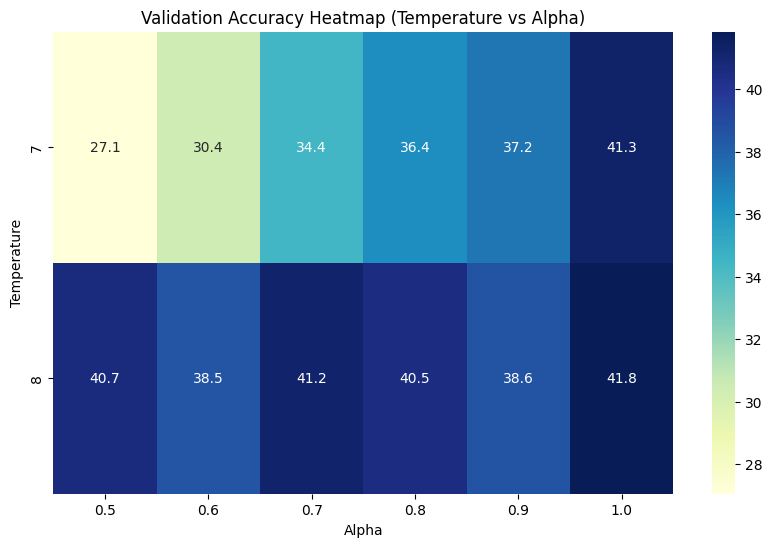

In [12]:
# Plot heatmap
df = pd.DataFrame(results, columns=["Temperature", "Alpha", "Best_Validation_Accuracy"])
heatmap_data = df.pivot(index="Temperature", columns="Alpha", values="Best_Validation_Accuracy")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Validation Accuracy Heatmap (Temperature vs Alpha)")
plt.savefig("distillation_heatmap.png")
plt.show()
